# Feature Engineering & Cleaning
Here we will perform some data cleaning and also a minimum feature engineering on the dataset
Activites inculude:


*   Remove duplicate features
*   Remove features with standard deviation equals 0
*   Analyze Missing Values


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_full = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v3_Sorted_Raw_Db_with_RUL.csv", sep=',', low_memory=False)
#data_comb = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_Sorted_Database.csv", sep=',', low_memory=False)


In [ ]:
data_full.shape

(19954, 449)

In [ ]:
data_full

,BIWEEK_SEND_DATE,Malfunction_Label,RUL,DELIVERY_DATE,DELIVERY_DATE.1,LAST_RUN,LAST_RUN.1,T_CHASSIS,INT_BWSD,LX_PMU_P1FH1_SLOPE_X_INDEX_10,LX_PMU_P1FH1_SLOPE_X_INDEX_11,LX_PMU_P1FH1_SLOPE_X_INDEX_12,LX_PMU_P1FH1_SLOPE_X_INDEX_13,LX_PMU_P1FH1_SLOPE_X_INDEX_14,LX_PMU_P1FH1_SLOPE_X_INDEX_15,LX_PMU_P1FH1_SLOPE_X_INDEX_16,LX_PMU_P1FH1_SLOPE_X_INDEX_17,LX_PMU_P1FH1_SLOPE_X_INDEX_18,LX_PMU_P1FH1_SLOPE_X_INDEX_19,LX_PMU_P1FH1_SLOPE_X_INDEX_2,LX_PMU_P1FH1_SLOPE_X_INDEX_20,LX_PMU_P1FH1_SLOPE_X_INDEX_21,LX_PMU_P1FH1_SLOPE_X_INDEX_22,LX_PMU_P1FH1_SLOPE_X_INDEX_23,LX_PMU_P1FH1_SLOPE_X_INDEX_24,LX_PMU_P1FH1_SLOPE_X_INDEX_25,LX_PMU_P1FH1_SLOPE_X_INDEX_26,LX_PMU_P1FH1_SLOPE_X_INDEX_27,LX_PMU_P1FH1_SLOPE_X_INDEX_28,LX_PMU_P1FH1_SLOPE_X_INDEX_29,LX_PMU_P1FH1_SLOPE_X_INDEX_3,LX_PMU_P1FH1_SLOPE_X_INDEX_30,LX_PMU_P1FH1_SLOPE_X_INDEX_31,LX_PMU_P1FH1_SLOPE_X_INDEX_4,LX_PMU_P1FH1_SLOPE_X_INDEX_5,LX_PMU_P1FH1_SLOPE_X_INDEX_6,LX_PMU_P1FH1_SLOPE_X_INDEX_7,LX_PMU_P1FH1_SLOPE_X_INDEX_8,LX_PMU_P1FH1_SLOPE_X_INDEX_9,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_1,...,VAR_UBX_HYDRAULIC_PUMP_ENG_MTD,VAR_4QB_BODYBUILDER_EL_INTERFCAB_CHAS,VAR_REX_CRANK_CASE_VENTILATION,VAR_78X_TRANSPORT_CYCLE,VAR_T2X_TRANSMISSIONRETARDER_COOLER,VAR_U4X_BRAKE_DRIVE_REAR,VAR_FVX_FRONT_AXLE_LOAD,VAR_VWX_COMPRESSOR_CAPACITY,VAR_H1B_TURBO_APPLICATION,VAR_FDX_REAR_AXLE_ARRANGEMENT,VAR_7PX_HYDRAULIC_PUMP_GEARBOX_MOUNTED,VAR_7NA_FRONT_SUSPENSION_INSTALLATION,VAR_LKX_DRIVER_STATE_SENSING_SYSTEM,VAR_QWX_TURBO,VAR_FZX_FRONT_AXLE_ARRANGEMENT,VAR_V6X_RETARDER,VAR_K4C_VEHICLE_UPTIME_SETTINGS,VAR_0RA_REGENERATION_CONTROLS_DPF,VAR_YKX_FRONT_SUSPENSION_SYSTEM,VAR_T3X_PTO_ENGINE_REAR_MOUNTED,VAR_PJX_ALTERNATOR_CAPACITY,VAR_41X_PARKING_HEATER,VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL,VAR_5JB_TELEMATICS_COMMUNICAT_GATEWAYS,VAR_RWX_TRANSMISSION,VAR_DHX_ROAD_CONDITION,VAR_2EX_CAB_TILT_PUMP,VAR_D9C_EMISSION_LEVEL,VAR_DDX_CHASSIS_TYPE,VAR_O8A_ENGINE_PTO_TORQUE_CAPACITY,VAR_33A_CAB_HEIGHT,VAR_J2A_ACTIVE_STEERING,VAR_N9C_ADR_CLASSIFICATION,VFE_0001_HORSE_POWER,VFE_0002_GROSS_COMBINATION_WEIGHT_BIN,VFE_0003_ENGINE_GENERATION,VFE_0004_REAR_AXLE_LOAD_BIN,VFE_0005_REAR_AXLE_RATIO_BIN,VFE_0009_LTVF_TYPE,VFE_0007_CAB_HEIGHT
0,2016-05-01,0,39.0,2014-07-19,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16922,3.156560e+05,4.966750e+05,9.692990e+05,2.030378e+06,3.743489e+06,7.958141e+06,2.325008e+07,2.187799e+07,7.834793e+06,3.716118e+06,2255.0,2.006061e+06,1.008061e+06,6.214160e+05,354023.000000,302163.000000,154487.000000,113420.000000,68134.000000,31293.000000,39278.00000,14306.0,17461.000000,4945.0,45373.000000,32145.000000,63026.0,122601.0,105194.000000,237784.000000,NaN,...,UHPE,UBBCHAS,CCV-C,TC-CONST,WTCOOL,BR-DIBAS,FAL9.0,2COMP900,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,CABH215
1,2016-05-15,0,25.0,2014-07-19,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16936,3.250415e+05,5.111530e+05,9.957835e+05,2.084542e+06,3.823374e+06,8.083754e+06,2.344140e+07,2.207512e+07,7.954288e+06,3.790668e+06,2255.0,2.060664e+06,1.034666e+06,6.363650e+05,362907.500000,309492.500000,159553.000000,121808.500000,72679.000000,33810.500000,42221.00000,15110.5,18778.500000,5035.5,49102.000000,34277.000000,68083.5,130569.5,108928.500000,243480.500000,NaN,...,UHPE,UBBCHAS,CCV-C,TC-CONST,WTCOOL,BR-DIBAS,FAL9.0,2COMP900,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,CABH215
2,2016-06-01,1,8.0,2014-07-19,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16953,3.312255e+05,5.192985e+05,1.012932e+06,2.119967e+06,3.881924e+06,8.220291e+06,2.381218e+07,2.241359e+07,8.077732e+06,3.848678e+06,2276.0,2.095507e+06,1.053592e+06,6.468220e+05,368683.000000,313107.500000

## Duplicates Features
find duplicates column in the dateset. This process should be automatic in process


In [ ]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [ ]:
# fetch out the duplicates columns - It will take sometime: Quadratic time complexity
dup_columns = getDuplicateColumns(data_full)

In [ ]:
# the duplicate columns
# we have 7 duplicate features
dup_columns

['X_PSC_P1ATW_OIL_QUALITY',
 'X_PSC_P1ATP_OIL__DEGRADATION_DISTANCE_STAR',
 'X_PSC_P1JR5_AUTOMATIC_SULPHUR_DPF_REGENERA',
 'X_PSC_MI_ENABLE_IMMOBILISER',
 'X_PSC_P1AL0_DIFFERENTIATED_RSL_ENABLE',
 'X_PSC_P1IPW_TOTAL_USED_UREA__G',
 'DELIVERY_DATE.1']

In [ ]:
# now drop all the duplicate columns
data_full = data_full.drop(labels=dup_columns, axis=1)

In [ ]:
data_full.shape

(19954, 442)

# Columns with Zero Varaince

In [ ]:
# finding column data with almost zero standard deviation. 
std_data = data_full.describe().transpose().loc[:,'std']

In [ ]:
# this columns have zero standard deviation
zero_std_columns = std_data[std_data == 0]
# we have 6 features with zero variance
zero_std_columns

X_PST_P1C3B_128_VDLRSL2NDTHRESHOLDACTIVEDISTAN    0.0
X_PST_P1C2J_527_TLDRIVINGMONSYSTEMRECOMMENDEDG    0.0
X_PSC_P1JRU_AUTOMATIC_SOOT_DISTANCE_REGENE        0.0
X_PSC_P1JR2_AUTOMATIC_HC_DPF_REGENERATION_        0.0
X_PSC_P1ATQ_OIL__DEGRADATION_HOURS_START          0.0
X_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_20      0.0
Name: std, dtype: float64

In [ ]:
zero_std_columns_list = list(zero_std_columns.index)

In [ ]:
# drop all features with zero variance
data_full = data_full.drop(labels=zero_std_columns_list, axis=1)

# Drop Redundant Features

In [ ]:
# drop the "Index" feature 
data_full = data_full.drop(['Index'], axis=1)

In [ ]:
# now we have 435 features now
data_full.shape

(19954, 435)

# Evaluate Missing Values

In [ ]:
data_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Malfunction_Label,19954.0,2.626040e-02,1.599127e-01,0.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
RUL,19954.0,3.914610e+02,2.724060e+02,0.0,158.000000,3.490000e+02,5.920000e+02,1.138000e+03
INT_BWSD,19954.0,1.738736e+04,2.820356e+02,16922.0,17150.000000,1.736200e+04,1.760500e+04,1.803100e+04
LX_PMU_P1FH1_SLOPE_X_INDEX_10,19162.0,7.735680e+05,8.402203e+05,0.0,228111.825000,5.389347e+05,1.048389e+06,8.552595e+06
LX_PMU_P1FH1_SLOPE_X_INDEX_11,19162.0,1.632954e+06,1.452299e+06,0.0,560239.500000,1.294477e+06,2.267688e+06,1.115300e+07
...,...,...,...,...,...,...,...,...
SLX_PFE_0009_PCT_TOP_GEAR,19671.0,6.374342e-01,1.543447e+00,0.0,0.495056,6.276939e-01,7.418180e-01,2.053723e+02
LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION,19954.0,8.063751e+04,4.979070e+04,0.0,42248.031935,7.523356e+04,1.127238e+05,3.650418e+05
VFE_0005_VEHICLE_OPERATION_DIGIT1,19954.0,1.846347e+00,1.394998e+00,1.0,1.000000,1.000000e+00,4.000000e+00,6.000000e+00
VFE_0006_VEHICLE_OPERATION_DIGIT2,19954.0,5.488925e+00,2.858830e+00,1.0,2.000000,8.000000e+00,8.000000e+00,8.000000e+00


Percentage of samples having missing values

In [ ]:
# total percentage of data with missing values = 33.6023% of the samples have missing values
data_full.isnull().sum(axis=1).sort_values(ascending=False)

8724     201
4710     201
10586    200
1023     198
8736     197
        ... 
10680      0
10679      0
10678      0
10677      0
9976       0
Length: 19954, dtype: int64

In [ ]:
data_full.isnull().sum(axis=1)[data_full.isnull().sum(axis=1) > 0].shape[0]

6705

In [ ]:
# total percentage of data with missing values = 33.6023% of the samples have missing values
100 * (data_full.isnull().sum(axis=1)[data_full.isnull().sum(axis=1) > 0].shape[0] / data_full.shape[0])

33.602285256089004

In [ ]:
# check columns with missing values
pd.set_option('display.max_rows', 500)
# in percentage
100 * (data_full.isnull().sum().sort_values(ascending=False) / data_full.shape[0])

LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D         15.590859
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING         14.628646
LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER           7.933246
LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT          4.951388
LX_PSC_P1ASI_COOLANT_PUMP_ACTIVATION_TIME            4.951388
LX_PSC_P1I80_TOP_VALUE_OF_ENGINE_SPEED_IN_O          4.946377
X_PSC_P1ATR_OIL_DEGRADATION_LAST_OLC_DISTA           4.715846
X_PSC_P1ATS_OIL_DEGRADATION_LAST_OLC_HOURS           4.715846
X_PSC_P1ATV_OIL_LIFE_AT_PAST_DUE                     4.715846
X_PSC_P1IOY_SOOT_MASS_REPORTED_BY_KALMAN_F           4.495339
X_PSC_P1JAZ_RATED_ENGINE_POWER                       4.495339
X_PSC_P1IT7_NUMBER_OF_TIMES_THE_ESTIMATED_           4.495339
X_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS           4.495339
X_PSC_P1JBT_SCR_OPERATOR_INDUCEMENT_REASON           4.495339
X_PSC_P1LJQ_ADBLUE_ADAPTION_FACTOR_INITIAL           4.495339
SX_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS          4.495339
X_PSC_P1

In [ ]:
data_full['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].describe()

count    16843.000000
mean      7754.509044
std       5235.361991
min          0.000000
25%       4019.872549
50%       6695.207547
75%      10288.343521
max      40433.000000
Name: LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D, dtype: float64

# Transform Time Feature to data_time 

In [ ]:
data_full['BIWEEK_SEND_DATE']

0        2016-05-01
1        2016-05-15
2        2016-06-01
3        2016-05-01
4        2016-05-15
            ...    
19949    2018-09-15
19950    2018-10-01
19951    2019-02-01
19952    2016-05-01
19953    2016-05-01
Name: BIWEEK_SEND_DATE, Length: 19954, dtype: object

In [ ]:
# convert all time object date to datetime dtype
time_features = ['BIWEEK_SEND_DATE', 'DELIVERY_DATE', 'LAST_RUN', 'LAST_RUN.1']
for col in time_features:
  data_full[col] = pd.to_datetime(data_full[col], infer_datetime_format=True)

In [ ]:
# Now we will extract out the day, month, and year information from the 'BiWeek Send data' information. That feature was the date the data was collected
day_data = data_full['BIWEEK_SEND_DATE'].dt.day
month_data = data_full['BIWEEK_SEND_DATE'].dt.month
year_data = data_full['BIWEEK_SEND_DATE'].dt.year

# insert into the dataframe
data_full.insert(1, 'DAY', day_data)
data_full.insert(2, 'MONTH', month_data)
data_full.insert(3, 'YEAR', year_data)

Re-order the arrangments of the columns.
Goal is to move 'Day', 'Month', and 'year' to the front

In [ ]:
data_full

,BIWEEK_SEND_DATE,DAY,MONTH,YEAR,Malfunction_Label,RUL,DELIVERY_DATE,LAST_RUN,LAST_RUN.1,T_CHASSIS,INT_BWSD,LX_PMU_P1FH1_SLOPE_X_INDEX_10,LX_PMU_P1FH1_SLOPE_X_INDEX_11,LX_PMU_P1FH1_SLOPE_X_INDEX_12,LX_PMU_P1FH1_SLOPE_X_INDEX_13,LX_PMU_P1FH1_SLOPE_X_INDEX_14,LX_PMU_P1FH1_SLOPE_X_INDEX_15,LX_PMU_P1FH1_SLOPE_X_INDEX_16,LX_PMU_P1FH1_SLOPE_X_INDEX_17,LX_PMU_P1FH1_SLOPE_X_INDEX_18,LX_PMU_P1FH1_SLOPE_X_INDEX_19,LX_PMU_P1FH1_SLOPE_X_INDEX_2,LX_PMU_P1FH1_SLOPE_X_INDEX_20,LX_PMU_P1FH1_SLOPE_X_INDEX_21,LX_PMU_P1FH1_SLOPE_X_INDEX_22,LX_PMU_P1FH1_SLOPE_X_INDEX_23,LX_PMU_P1FH1_SLOPE_X_INDEX_24,LX_PMU_P1FH1_SLOPE_X_INDEX_25,LX_PMU_P1FH1_SLOPE_X_INDEX_26,LX_PMU_P1FH1_SLOPE_X_INDEX_27,LX_PMU_P1FH1_SLOPE_X_INDEX_28,LX_PMU_P1FH1_SLOPE_X_INDEX_29,LX_PMU_P1FH1_SLOPE_X_INDEX_3,LX_PMU_P1FH1_SLOPE_X_INDEX_30,LX_PMU_P1FH1_SLOPE_X_INDEX_31,LX_PMU_P1FH1_SLOPE_X_INDEX_4,LX_PMU_P1FH1_SLOPE_X_INDEX_5,LX_PMU_P1FH1_SLOPE_X_INDEX_6,LX_PMU_P1FH1_SLOPE_X_INDEX_7,LX_PMU_P1FH1_SLOPE_X_INDEX_8,...,VAR_UBX_HYDRAULIC_PUMP_ENG_MTD,VAR_4QB_BODYBUILDER_EL_INTERFCAB_CHAS,VAR_REX_CRANK_CASE_VENTILATION,VAR_78X_TRANSPORT_CYCLE,VAR_T2X_TRANSMISSIONRETARDER_COOLER,VAR_U4X_BRAKE_DRIVE_REAR,VAR_FVX_FRONT_AXLE_LOAD,VAR_VWX_COMPRESSOR_CAPACITY,VAR_H1B_TURBO_APPLICATION,VAR_FDX_REAR_AXLE_ARRANGEMENT,VAR_7PX_HYDRAULIC_PUMP_GEARBOX_MOUNTED,VAR_7NA_FRONT_SUSPENSION_INSTALLATION,VAR_LKX_DRIVER_STATE_SENSING_SYSTEM,VAR_QWX_TURBO,VAR_FZX_FRONT_AXLE_ARRANGEMENT,VAR_V6X_RETARDER,VAR_K4C_VEHICLE_UPTIME_SETTINGS,VAR_0RA_REGENERATION_CONTROLS_DPF,VAR_YKX_FRONT_SUSPENSION_SYSTEM,VAR_T3X_PTO_ENGINE_REAR_MOUNTED,VAR_PJX_ALTERNATOR_CAPACITY,VAR_41X_PARKING_HEATER,VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL,VAR_5JB_TELEMATICS_COMMUNICAT_GATEWAYS,VAR_RWX_TRANSMISSION,VAR_DHX_ROAD_CONDITION,VAR_2EX_CAB_TILT_PUMP,VAR_D9C_EMISSION_LEVEL,VAR_DDX_CHASSIS_TYPE,VAR_O8A_ENGINE_PTO_TORQUE_CAPACITY,VAR_33A_CAB_HEIGHT,VAR_J2A_ACTIVE_STEERING,VAR_N9C_ADR_CLASSIFICATION,VFE_0001_HORSE_POWER,VFE_0002_GROSS_COMBINATION_WEIGHT_BIN,VFE_0003_ENGINE_GENERATION,VFE_0004_REAR_AXLE_LOAD_BIN,VFE_0005_REAR_AXLE_RATIO_BIN,VFE_0009_LTVF_TYPE,VFE_0007_CAB_HEIGHT
0,2016-05-01,1,5,2016,0,39.0,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16922,3.156560e+05,4.966750e+05,9.692990e+05,2.030378e+06,3.743489e+06,7.958141e+06,2.325008e+07,2.187799e+07,7.834793e+06,3.716118e+06,2255.0,2.006061e+06,1.008061e+06,6.214160e+05,354023.000000,302163.000000,154487.000000,113420.000000,68134.000000,31293.000000,39278.00000,14306.0,17461.000000,4945.0,45373.000000,32145.000000,63026.0,122601.0,105194.000000,...,UHPE,UBBCHAS,CCV-C,TC-CONST,WTCOOL,BR-DIBAS,FAL9.0,2COMP900,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,CABH215
1,2016-05-15,15,5,2016,0,25.0,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16936,3.250415e+05,5.111530e+05,9.957835e+05,2.084542e+06,3.823374e+06,8.083754e+06,2.344140e+07,2.207512e+07,7.954288e+06,3.790668e+06,2255.0,2.060664e+06,1.034666e+06,6.363650e+05,362907.500000,309492.500000,159553.000000,121808.500000,72679.000000,33810.500000,42221.00000,15110.5,18778.500000,5035.5,49102.000000,34277.000000,68083.5,130569.5,108928.500000,...,UHPE,UBBCHAS,CCV-C,TC-CONST,WTCOOL,BR-DIBAS,FAL9.0,2COMP900,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,CABH215
2,2016-06-01,1,6,2016,1,8.0,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16953,3.312255e+05,5.192985e+05,1.012932e+06,2.119967e+06,3.881924e+06,8.220291e+06,2.381218e+07,2.241359e+07,8.077732e+06,3.848678e+06,2276.0,2.095507e+06,1.053592e+06,6.468220e+05,368683.000000,313107.500000,162794.500000,125879.000000,74443.500000,34075.500000,42584.00000,15389.0,19223.000000,5106.0,49504.000000,34468.50

In [ ]:
data_full.shape

(19954, 438)

In [ ]:
# save new data frame
# data_full.to_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v1_feature_engineering_data.csv", sep=',', index=False)


# Find categorical Features

In [ ]:
data_full.select_dtypes(include=['object']).columns

In [ ]:
# The total number of categorical features plus T-Chassis
data_full.select_dtypes(include=['object']).columns.shape[0]

In [ ]:
data_full['VFE_0007_CAB_HEIGHT'].value_counts()

### Find Correlation with RUL

In [ ]:
data_full.corr()['RUL'].sort_values(ascending=False)

In [ ]:
data_full['X_PST_P1E1D_1076_MILEAGE_CARTRIDGE_N1']

In [ ]:
data_full

# EDA - Exploratory Data Anaylsis

In [ ]:
# find chassis with more than 3 failurs

unique_chassis = list(data_full['T_CHASSIS'].unique())

In [ ]:
# these chassis have more 5 or more failures in their lifetime.
for chassis in unique_chassis:
  if data_full[data_full['T_CHASSIS'] == chassis]['Malfunction_Label'].sum() > 4:
    print (chassis)

In [ ]:
temp = data_full[data_full['T_CHASSIS'] == 'O-731397']

In [ ]:
temp[['BIWEEK_SEND_DATE', 'YEAR', 'RUL']]

In [ ]:
# show data the vehicle failed
temp[temp['Malfunction_Label'] == 1][['BIWEEK_SEND_DATE', 'YEAR', 'RUL']]

In [ ]:
temp['Malfunction_Label'].sum()

In [ ]:
plt.figure(figsize=(12,7))
plt.title("RUL Degradation Profile")
sns.lineplot(x='MONTH', hue='YEAR', y='RUL', palette='bright', data=temp, linewidth=2.5, ci=None)
plt.legend()


In [ ]:
plt.figure(figsize=(12,7))
plt.title("RUL Degradation Profile")
sns.lineplot(x='AGE_MONTHS', hue='YEAR', y='RUL', palette='bright', data=temp, ci=None)
plt.legend()

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='AGE_MONTHS', y='RUL', data=temp)

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='AGE_MONTHS', y='SLX_PSC_P1EVS_CLUTCH_PLATE_WEAR', data=temp)         

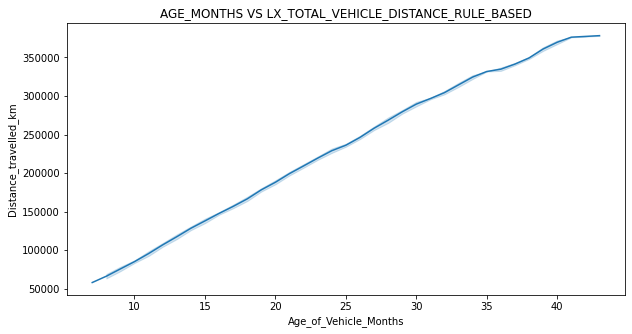

In [ ]:
#Graph for justifying accumulative data

plt.figure(figsize=(10,5))
ax = sns.lineplot(x='AGE_MONTHS', y=temp['LX_TOTAL_VEHICLE_DISTANCE_RULE_BASED'], data=temp)
ax.set(xlabel='Age_of_Vehicle_Months', ylabel='Distance_travelled_km')
plt.title("AGE_MONTHS VS LX_TOTAL_VEHICLE_DISTANCE_RULE_BASED")
plt.show()

In [ ]:
  
plt.figure(figsize=(10,5))
sns.lineplot(x='AGE_MONTHS', y='SLX_PFE_0004_UREA_OVER_FUEL', data=temp)             

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='AGE_MONTHS', y='LX_PST_P1H6B_144_EGSCOND', data=temp)     

In [ ]:

plt.figure(figsize=(10,5))
sns.lineplot(x='AGE_MONTHS', y='LX_PST_P1H6B_142_PMCOND', data=temp)  

In [ ]:
plt.figure(figsize=(20,5))
temp.corr()['RUL'].sort_values(ascending=False)[:100].plot(kind='bar')

In [ ]:
data_full['T_CHASSIS'].unique().shape

# Evaluation of Categorical Variables

In [ ]:
# current number of categorical variables. ignore T-CHASSIS
cat_features = data_full.select_dtypes(include=['object']).columns[1:]

In [ ]:
# current number of categorical variables without considering t-chassis
cat_features.shape[0]

In [ ]:
cat_features[0]

In [ ]:
# find out the total number of unqiue variables in all the categorical features
data_full[cat_features].nunique().sum()

In [ ]:
cat_data = data_full[cat_features]

In [ ]:
cat_data

In [ ]:
pd.get_dummies(cat_data[cat_features], drop_first=False)

In [ ]:
# Calculate the possible dimension size from learned embeddings.
# max dimension allowed for a feature is 10
vector_size = 0
for column in cat_features:
  cardinatiy_size = cat_data[column].nunique()
  vector_size += min(3, cardinatiy_size // 2)

print ("Embeddings dimension - ", vector_size)

In [ ]:
cardinatiy_size // 3

In [ ]:
cat_data.describe().transpose()

# Numerical Features Analysis



In [ ]:
# remove 
others = ['T_CHASSIS', 'Malfunction_Label', 'DELIVERY_DATE', 'LAST_RUN', 'LAST_RUN.1', 'BIWEEK_SEND_DATE']

In [ ]:
num_features = (list(set(data_full.columns) - set(cat_features) - set(others))) 

In [ ]:
len(num_features)

In [ ]:
data_full[num_features].describe()

In [ ]:
# drop na value for now
data = data_full[num_features].dropna()
data.shape

In [ ]:
data.dtypes

In [ ]:
X = c.values
y = data['RUL'].values

In [ ]:
# scale the value
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
mutual_score = mutual_info_regression(X=X, y=y, n_neighbors=4)

In [ ]:
# ploting the result of mutual information
plt.figure(figsize=(70, 5))
g = sns.barplot(x=data.drop(labels='RUL', axis=1).columns, y=mutual_score)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features")

In [ ]:
count = 0
for x in mutual_score:
  if x > 0.3:
    count += 1
print (count)

In [ ]:
### an helper function for extracting the best features possible
def extract_best_features(feature_scores, feature_col, n=5, sort_metric=False):
    # this function extracts out the best features.
    # inputs 
    temp = np.hstack((feature_scores.reshape(-1,1), feature_col.reshape(-1,1)))
    features = pd.DataFrame(temp, columns=['score', 'name'])
    # sort the features
    features = features.sort_values(by=['score'], ascending=sort_metric).reset_index(drop=True)
    # extract the best features
    best_features = features.iloc[:n, :].to_numpy()
    return best_features

In [ ]:
best_features = extract_best_features(mutual_score, data.drop(labels='RUL', axis=1).columns.values, n=10)
best_features

In [ ]:

from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');